In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from mm_analytics.objects import TEAM_NAMES, NpEncoder
# Load Feature File
df = pd.read_csv("../TeamSeasons.csv")

In [79]:
resume_cols = ["Q1_WinPct", "Q2_WinPct", "Q3_WinPct", "Q4_WinPct", "SOS", "SOV", "NET_last"]
resume_df = df[resume_cols]
fill_nas = {"Q1_WinPct": 0.0, "Q2_WinPct": 0.0, "Q3_WinPct": 0.0, "Q4_WinPct": 0.0, "SOS": 0.0, "SOV": 0.0, "NET_last": 0.0}
resume_df.fillna(value=fill_nas, inplace=True)
stat_cols = ["AdjOE_mean", "AdjDE_mean", "Poss_mean", "FGA3_mean", "FTA_mean", "FG%_mean","FG3%_mean","FT%_mean","Ast_mean","TO_mean","OR_mean", "OppFGA3_mean", "OppFTA_mean", "OppFG%_mean","OppFG3%_mean","OppFT%_mean","OppAst_mean","OppTO_mean","OppOR_mean"]
stat_df = df[stat_cols]

/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_2668/1447895660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df.fillna(value=fill_nas, inplace=True)
/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_2668/1447895660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df.fillna(value=fill_nas, inplace=True)
/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_2668/1447895660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [80]:
print(resume_df.to_csv("res_fill.csv"))
resume_scaler = MinMaxScaler()
t_resume_df = resume_scaler.fit_transform(resume_df)
resume_similarity = cosine_similarity(t_resume_df)

None


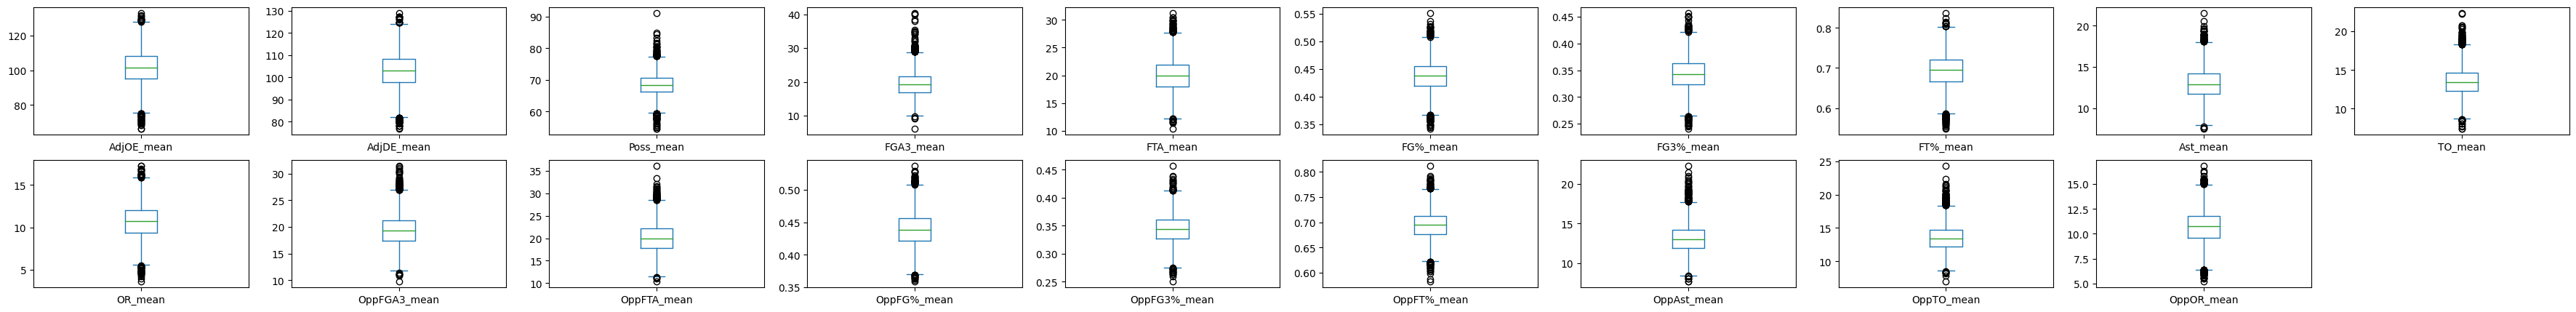

In [ ]:
# Set fig size
stat_df.plot(kind='box', subplots=True, layout=(2,10), sharex=False, sharey=False, figsize=(45,5))
plt.show()


In [ ]:
stat_scaler = MinMaxScaler()
t_stat_df = stat_scaler.fit_transform(stat_df)
stat_similarity = cosine_similarity(t_stat_df)

In [ ]:
avg_similarity = (resume_similarity + stat_similarity) / 2

In [82]:
print(f"Min: {min([min(s) for s in stat_similarity])}, Max: {max([max(s) for s in stat_similarity])}")
print(f"Min: {min([min(s) for s in resume_similarity])}, Max: {max([max(s) for s in resume_similarity])}")

Min: 0.41222346851450214, Max: 1.0000000000000007
Min: 0.029554791805290977, Max: 1.0000000000000004


In [ ]:
similar_teams = {}
for i in range(len(avg_similarity)):
    avg_similarity[i][i] = 0

    arr = avg_similarity[i]
    # Get the indices of the most similar 3 values
    top_3_indices = arr.argsort()[-3:][::-1]

    # Print the top 3 values and their indices
    cur_team = df.iloc[i]
    similar_teams[(cur_team['TeamID'], cur_team['Season'])] = [
        ((df.iloc[j]['TeamID'], df.iloc[j]['Season']), avg_similarity[i][j], stat_similarity[i][j], resume_similarity[i][j]) for j in top_3_indices]

In [2]:
# Validate new utility function
from mm_analytics.utilities import get_historical_similarity

new_sim = get_historical_similarity(df, 3)

/Users/andrewgrowney/.pyenv/versions/3.9.10/envs/nlu/lib/python3.9/site-packages/mm_analytics/utilities.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df.fillna(0, inplace=True)
